In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [336]:
pricing = pd.read_csv('C:/Users/saranya cj/Downloads/Pricing_Data.csv')
inventory = pd.read_csv('C:/Users/saranya cj/Downloads/Inventory_Health.csv')
ads = pd.read_csv('C:/Users/saranya cj/Downloads/Ads_Performance.csv')
competitor_data = pd.read_csv('C:/Users/saranya cj/Downloads/Competitor_Data.csv')
Historical_sales = pd.read_csv('C:/Users/saranya cj/Downloads/Historical_Sales.csv')

In [337]:
## next cleaning data sets# Clean currency and percentage symbols to make them numbers#

In [338]:
pricing['Cost'] = pd.to_numeric(
    pricing['Cost'].astype(str).str.replace('$', '', regex=False),
    errors='coerce')
pricing ['Current_Price'] =pricing ['Current_Price'].str.replace('$','').astype(float)
pricing ['Minimum_margin'] = pricing['Minimum_Acceptable_Margin_%'].str.replace('%', '').astype(float) / 100

In [ ]:
# Merge into one master dataframe

In [ ]:
df= pricing.merge(inventory, on='SKU', how ='left')
df=df.merge(competitor_data, on='SKU', how ='left')

In [ ]:
df.head

In [ ]:
df.info

In [298]:
df.isnull().sum()

SKU                            0
Product_description            0
Product Role                   0
Country_of_Origin              0
FBA Fee                        0
Storage Fee                    0
Handling_Cost                  0
Cost                           0
Current_Price                  0
Minimum_Acceptable_Margin_%    0
Target_Gross_Margin_%          0
Minimum_margin                 0
Sessions - Total               0
Units Ordered                  0
Ordered Product Sales          0
Total Order Items              0
demand_signal                  0
days-of-supply                 0
inventory_signal               0
spend                          0
acosClicks7d                   0
ads_signal                     0
Highest_Competitor_Price       0
dtype: int64

In [299]:
##Describe ALL columns

In [300]:
df.describe(include='all')

,SKU,Product_description,Product Role,Country_of_Origin,FBA Fee,Storage Fee,Handling_Cost,Cost,Current_Price,Minimum_Acceptable_Margin_%,...,Units Ordered,Ordered Product Sales,Total Order Items,demand_signal,days-of-supply,inventory_signal,spend,acosClicks7d,ads_signal,Highest_Competitor_Price
count,50,50,50,50,50,50,50,50.000000,50.000000,50,...,50.000000,50.000000,50.00000,50,50.000000,50,50.000000,50.000000,50,50.000000
unique,50,50,2,1,46,32,2,NaN,NaN,2,...,NaN,NaN,NaN,2,NaN,3,NaN,NaN,2,NaN
top,MN-01,Rectangle Tray -14 x 10 Inch - Pk of 25,Core,India,$12.89,$0.30,$0.75,NaN,NaN,20%,...,NaN,NaN,NaN,high,NaN,healthy,NaN,NaN,inefficient,NaN
freq,1,1,46,50,2,4,49,NaN,NaN,46,...,NaN,NaN,NaN,25,NaN,35,NaN,NaN,25,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.600000,30.102000,NaN,...,804.680000,26852.829400,592.92000,NaN,77.600000,NaN,3457.929400,26.118222,NaN,38.724000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.422516,16.449344,NaN,...,824.930806,32166.069315,616.15519,NaN,31.653739,NaN,4617.222467,12.160356,NaN,20.769123
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,9.950000,NaN,...,43.000000,1300.990000,35.00000,NaN,0.000000,NaN,194.110000,4.614372,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,21.900000,NaN,...,283.500000,7725.412500,195.00000,NaN,63.250000,NaN,1089.580000,18.191715,NaN,28.400000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.500000,27.900000,NaN,...,481.500000,13856.075000,395.00000,NaN,79.500000,NaN,2017.360000,24.113521,NaN,36.900000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,32.650000,NaN,...,1193.000000,32106.410000,650.00000,NaN,89.750000,NaN,3891.327500,31.791817,NaN,41.412500


In [301]:
##Describe only numeric columns

In [302]:
df.describe(include='number')

,Cost,Current_Price,Minimum_margin,Sessions - Total,Units Ordered,Ordered Product Sales,Total Order Items,days-of-supply,spend,acosClicks7d,Highest_Competitor_Price
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,12.600000,30.102000,0.204000,2735.980000,804.680000,26852.829400,592.92000,77.600000,3457.929400,26.118222,38.724000
std,8.422516,16.449344,0.013702,2570.315938,824.930806,32166.069315,616.15519,31.653739,4617.222467,12.160356,20.769123
min,3.000000,9.950000,0.200000,168.000000,43.000000,1300.990000,35.00000,0.000000,194.110000,4.614372,0.000000
25%,7.000000,21.900000,0.200000,971.500000,283.500000,7725.412500,195.00000,63.250000,1089.580000,18.191715,28.400000
50%,11.500000,27.900000,0.200000,1919.000000,481.500000,13856.075000,395.00000,79.500000,2017.360000,24.113521,36.900000
75%,14.000000,32.650000,0.200000,3241.500000,1193.000000,32106.410000,650.00000,89.750000,3891.327500,31.791817,41.412500
max,44.000000,89.900000,0.250000,10412.000000,4471.000000,162093.760000,3059.00000,159.000000,28107.190000,77.141743,109.900000


In [303]:
## DATA TYPES CHECK

In [304]:
df[['Cost', 'FBA Fee', 'Storage Fee', 'Handling_Cost']].dtypes


Cost             float64
FBA Fee           object
Storage Fee       object
Handling_Cost     object
dtype: object

In [328]:
cost_cols = ['Cost', 'FBA Fee', 'Storage Fee', 'Handling_Cost']

for col in cost_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace('$', '', regex=False)
        .str.replace(',', '', regex=False)
        .str.strip()
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [306]:
# CALCULATE THE TRUE UNIT (landed price)

In [307]:
df['True_Unit_Cost'] = df[cost_cols].sum(axis=1)

In [308]:
df['True_Unit_Cost'].describe

<bound method NDFrame.describe of 0     32.30
1     26.60
2     30.03
3     25.94
4     25.77
5     14.37
6     29.87
7     26.11
8     14.92
9     17.40
10    15.26
11    17.87
12    17.80
13    24.93
14    19.24
15    17.40
16    27.98
17    27.73
18    32.94
19    11.02
20    19.40
21    19.08
22    10.40
23    15.62
24    31.21
25    26.85
26    24.18
27    22.47
28    17.71
29    35.23
30    26.55
31    23.91
32    22.16
33    28.44
34    28.49
35    25.05
36    25.92
37    25.54
38    22.93
39    19.67
40    63.42
41    50.79
42    10.81
43     9.66
44    25.68
45    20.99
46    55.34
47    68.98
48    30.56
49    27.60
Name: True_Unit_Cost, dtype: float64>

In [309]:
df['Minimum_Acceptable_Margin_%'].dtype



dtype('O')

In [316]:
df['Floor_Price'] = df['True_Unit_Cost'] * (  1 + df['Minimum_Acceptable_Margin_%'] / 100
)
df[['SKU',
    'True_Unit_Cost',
    'Floor_Price',
    'target_price',
    'Highest_Competitor_Price'
]].head()



,SKU,True_Unit_Cost,Floor_Price,target_price,Highest_Competitor_Price
0,MN-01,32.30,38.7600,43.6050,44.90
1,MN-02,26.60,31.9200,35.9100,39.95
2,MN-03,30.03,36.0360,40.5405,42.50
3,MN-04,25.94,31.1280,35.0190,35.90
4,MN-05,25.77,32.2125,37.3665,0.00


In [329]:
df['Minimum_Acceptable_Margin_%'] = (
    df['Minimum_Acceptable_Margin_%']
    .astype(str)
    .str.replace('%', '', regex=False)
    .astype(float)
)

df['Target_Gross_Margin_%'] = (  
    df['Target_Gross_Margin_%']
     .astype(str)
    .str.replace('%', '', regex=False)
    .str.strip()
    .astype(float)
)


In [86]:
## Set minimum and Target price
 ## This satisfies margin protection, a core business requirement.

In [229]:
df.columns

Index(['SKU', 'Product_description', 'Product Role', 'Country_of_Origin',
       'FBA Fee', 'Storage Fee', 'Handling_Cost', 'Cost', 'Current_Price',
       'Minimum_Acceptable_Margin_%', 'Target_Gross_Margin_%',
       'Minimum_margin', 'condition', 'total-inventory', 'available',
       'inbound-shipped', 'inbound-received', 'reserved-quantity',
       'unfulfillable-quantity', 'inv-age-0-to-30-days',
       'inv-age-31-to-60-days', 'inv-age-61-to-90-days',
       'inv-age-181-to-330-days', 'inv-age-331-to-365-days',
       'inv-age-365-plus-days', 'currency', 'units-shipped-t7',
       'units-shipped-t30', 'units-shipped-t60', 'units-shipped-t90',
       'sell-through', 'item-volume', 'volume-unit-measurement',
       'storage-type', 'storage-volume', 'marketplace', 'days-of-supply',
       'weeks-of-cover-t30', 'weeks-of-cover-t90', 'Avg_Competitor_Price',
       'Lowest_Competitor_Price', 'Highest_Competitor_Price',
       'Competitor_Count', 'True_Unit_Cost', 'Floor_Price'],
     

In [315]:
df['min_price'] = df['True_Unit_Cost'] * (1 +df['Minimum_Acceptable_Margin_%']/100)
df["target_price"] = df["True_Unit_Cost"] * (1 + df["Target_Gross_Margin_%"]/100)
df[['SKU', 'True_Unit_Cost', 'min_price', 'target_price']].head()


,SKU,True_Unit_Cost,min_price,target_price
0,MN-01,32.30,38.7600,43.6050
1,MN-02,26.60,31.9200,35.9100
2,MN-03,30.03,36.0360,40.5405
3,MN-04,25.94,31.1280,35.0190
4,MN-05,25.77,32.2125,37.3665


In [89]:
## demand signal

In [232]:
Historical_sales["demand_signal"] = Historical_sales["Units Ordered"].apply(
    lambda x: "high" if x > Historical_sales["Units Ordered"].median() else "low"
)


In [233]:
Historical_sales.head(10)



,Date,SKU,Sessions - Total,Page Views - Total,Units Ordered,Ordered Product Sales,Total Order Items,demand_signal
0,01/09/2025,MN-01,22.0,32.0,6.0,228.10,5.0,high
1,01/09/2025,MN-02,28.0,33.0,5.0,158.96,5.0,low
2,01/09/2025,MN-03,9.0,12.0,2.0,81.35,2.0,low
3,01/09/2025,MN-07,31.0,41.0,2.0,70.11,2.0,low
4,01/09/2025,MN-09,24.0,32.0,2.0,32.26,1.0,low
5,01/09/2025,MN-10,10.0,11.0,1.0,23.15,1.0,low
6,01/09/2025,MN-13,27.0,44.0,5.0,106.44,5.0,low
7,01/09/2025,MN-14,28.0,49.0,5.0,152.47,5.0,low
8,01/09/2025,MN-15,88.0,107.0,21.0,466.71,18.0,high
9,01/09/2025,MN-16,27.0,39.0,4.0,70.67,4.0,low


In [234]:
##Create Inventory Signal

In [235]:
inventory["inventory_signal"] = inventory["days-of-supply"].apply(
    lambda x: "low_stock" if x < 15 else "healthy"
)
inventory.head()

,SKU,condition,total-inventory,available,inbound-shipped,inbound-received,reserved-quantity,unfulfillable-quantity,inv-age-0-to-30-days,inv-age-31-to-60-days,...,sell-through,item-volume,volume-unit-measurement,storage-type,storage-volume,marketplace,days-of-supply,weeks-of-cover-t30,weeks-of-cover-t90,inventory_signal
0,MN-01,New,382.0,264,40,9,68,1,12,261,...,1.33,0.546781,cubic feet,Standard,144.350184,US,47,6,7,healthy
1,MN-02,New,306.0,206,80,2,18,0,127,91,...,1.56,0.373971,cubic feet,Standard,77.038026,US,85,7,8,healthy
2,MN-03,New,139.0,95,40,0,3,1,42,8,...,1.16,0.425846,cubic feet,Standard,40.455370,US,83,8,9,healthy
3,MN-04,New,171.0,70,80,8,13,0,3,84,...,1.65,0.375575,cubic feet,Standard,26.290250,US,99,8,10,healthy
4,MN-05,New,283.0,0,0,49,234,0,53,141,...,1.47,0.270417,cubic feet,Standard,0.000000,US,145,0,1,healthy


In [236]:
## adds performance signal

In [237]:
ads["ads_signal"] = ads["acosClicks7d"].apply(
    lambda x: "inefficient" if x > 0.35 else "efficient"
)
ads.head()

,date,SKU,impressions,clicks,costPerClick,clickThroughRate,cost,spend,currency-code,purchases1d,...,unitsSoldClicks30d,sales1d,sales7d,sales14d,sales30d,acosClicks7d,acosClicks14d,roasClicks7d,roasClicks14d,ads_signal
0,2025-09-01,MN-16,2016,14,1.998,0.694,27.97,27.97,USD,1,...,1,18.89,18.89,18.89,18.89,148.067761,148.067761,0.675366,0.675366,inefficient
1,2025-09-01,MN-15,1810,33,2.062,1.823,68.06,68.06,USD,4,...,6,107.45,161.31,161.31,161.31,42.192053,42.192053,2.370115,2.370115,inefficient
2,2025-09-01,MN-14,613,9,2.850,1.468,25.65,25.65,USD,0,...,1,0.00,90.98,90.98,90.98,28.193009,28.193009,3.546979,3.546979,inefficient
3,2025-09-01,MN-17,1271,3,5.620,0.236,16.86,16.86,USD,2,...,9,274.41,274.41,274.41,274.41,6.144091,6.144091,16.275801,16.275801,inefficient
4,2025-09-01,MN-25,1036,10,4.340,0.965,43.40,43.40,USD,1,...,8,218.30,851.24,851.24,851.24,5.098445,5.098445,19.613825,19.613825,inefficient


In [238]:
## merge all datasets based on sku level

In [317]:

df['min_price'] = df['True_Unit_Cost'] * (1 +df['Minimum_Acceptable_Margin_%']/100)
df["target_price"] = df["True_Unit_Cost"] * (1 + df["Target_Gross_Margin_%"]/100)
df[['SKU', 'True_Unit_Cost', 'min_price', 'target_price']].head()


,SKU,True_Unit_Cost,min_price,target_price
0,MN-01,32.30,38.7600,43.6050
1,MN-02,26.60,31.9200,35.9100
2,MN-03,30.03,36.0360,40.5405
3,MN-04,25.94,31.1280,35.0190
4,MN-05,25.77,32.2125,37.3665


In [264]:
df.columns

Index(['SKU', 'Product_description', 'Product Role', 'Country_of_Origin',
       'FBA Fee', 'Storage Fee', 'Handling_Cost', 'Cost', 'Current_Price',
       'Minimum_Acceptable_Margin_%', 'Target_Gross_Margin_%',
       'Minimum_margin', 'Sessions - Total', 'Units Ordered',
       'Ordered Product Sales', 'Total Order Items', 'demand_signal',
       'days-of-supply', 'inventory_signal', 'spend', 'acosClicks7d',
       'ads_signal', 'Highest_Competitor_Price'],
      dtype='object')

In [318]:
df[['target_price', 'min_price', 'Highest_Competitor_Price']].dtypes


target_price                float64
min_price                   float64
Highest_Competitor_Price    float64
dtype: object

In [ ]:
df['Highest_Competitor_Price'] = (
    df['Highest_Competitor_Price']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
)

df['Highest_Competitor_Price'] = pd.to_numeric(
    df['Highest_Competitor_Price'],
    errors='coerce'
)
df[['Highest_Competitor_Price']].dtypes


In [272]:
sales_agg = Historical_sales.groupby("SKU", as_index=False).agg({
    "Sessions - Total": "sum",
    "Units Ordered": "sum",
    "Ordered Product Sales": "sum",
    "Total Order Items": "sum"
})


In [244]:
sales_agg.info

<bound method DataFrame.info of       SKU  Sessions - Total  Units Ordered  Ordered Product Sales  \
0   MN-01            1921.0          587.0               24582.01   
1   MN-02            1842.0          431.0               15678.89   
2   MN-03             859.0          196.0                7340.65   
3   MN-04             604.0          191.0                6002.72   
4   MN-05            1917.0          341.0                8040.18   
5   MN-06             562.0          124.0                1978.61   
6   MN-07            1815.0          236.0                8815.03   
7   MN-08             168.0           43.0                1300.99   
8   MN-09             515.0           81.0                1347.61   
9   MN-10            1292.0          230.0                5079.01   
10  MN-11            1762.0          236.0                4487.02   
11  MN-12            2040.0          352.0                7675.78   
12  MN-13            4116.0          484.0               11960.96   
13

In [245]:
median_units = sales_agg['Units Ordered'].median()

sales_agg['demand_signal'] = np.where(
    sales_agg['Units Ordered'] > median_units,
    'high',
    'low'
)
sales_agg[['SKU', 'Units Ordered', 'demand_signal']].head()



,SKU,Units Ordered,demand_signal
0,MN-01,587.0,high
1,MN-02,431.0,low
2,MN-03,196.0,low
3,MN-04,191.0,low
4,MN-05,341.0,low


In [246]:
df = df.merge(
    sales_agg[["SKU", "demand_signal"]],
    on="SKU",
    how="left"
)


In [247]:
df.head()

,SKU,Product_description,Product Role,Country_of_Origin,FBA Fee,Storage Fee,Handling_Cost,Cost,Current_Price,Minimum_Acceptable_Margin_%,...,weeks-of-cover-t90,Avg_Competitor_Price,Lowest_Competitor_Price,Highest_Competitor_Price,Competitor_Count,True_Unit_Cost,Floor_Price,min_price,target_price,demand_signal
0,MN-01,Rectangle Tray -14 x 10 Inch - Pk of 25,Core,India,15.11,0.44,0.75,16.0,38.9,20.0,...,7,$36.90,$31.95,44.90,9,32.30,38.7600,38.7600,43.6050,high
1,MN-02,Rectangle Tray -12x10 - Pk of 25,Core,India,13.55,0.30,0.75,12.0,33.9,20.0,...,8,$32.50,$27.90,39.95,8,26.60,31.9200,31.9200,35.9100,low
2,MN-03,Oval Tray -15x10 Inch - Pk of 25,Core,India,13.94,0.34,0.75,15.0,34.9,20.0,...,9,$35.20,$29.99,42.50,7,30.03,36.0360,36.0360,40.5405,low
3,MN-04,Oval Tray - 13x9 Inch - pk of 25,Core,India,12.89,0.30,0.75,12.0,29.9,20.0,...,10,$28.40,$24.50,35.90,6,25.94,31.1280,31.1280,35.0190,low
4,MN-05,Christmas Tray - 17x12 Inch - Pk of 5,Seasonal,India,11.80,0.22,0.75,13.0,21.9,25.0,...,1,$23.90,$18.95,0.00,3,25.77,32.2125,32.2125,37.3665,low


In [248]:
inventory_agg = inventory.groupby("SKU", as_index=False).agg({
    "days-of-supply": "mean"
})


In [249]:
inventory_agg["inventory_signal"] = np.where(
    inventory_agg["days-of-supply"] < 30, "low_inventory",
    np.where(inventory_agg["days-of-supply"] > 90, "overstock", "healthy")
)
inventory_agg[["SKU", "days-of-supply", "inventory_signal"]].head()


,SKU,days-of-supply,inventory_signal
0,MN-01,47.0,healthy
1,MN-02,85.0,healthy
2,MN-03,83.0,healthy
3,MN-04,99.0,overstock
4,MN-05,145.0,overstock


In [250]:
df = df.drop(
    columns=['inventory_signal_x', 'inventory_signal_y', 'inventory_signal_new'],
    errors='ignore'
)


In [251]:
df = df.merge(
    inventory_agg[["SKU", "inventory_signal"]],
    on="SKU",
    how="left"
)
df.columns


Index(['SKU', 'Product_description', 'Product Role', 'Country_of_Origin',
       'FBA Fee', 'Storage Fee', 'Handling_Cost', 'Cost', 'Current_Price',
       'Minimum_Acceptable_Margin_%', 'Target_Gross_Margin_%',
       'Minimum_margin', 'condition', 'total-inventory', 'available',
       'inbound-shipped', 'inbound-received', 'reserved-quantity',
       'unfulfillable-quantity', 'inv-age-0-to-30-days',
       'inv-age-31-to-60-days', 'inv-age-61-to-90-days',
       'inv-age-181-to-330-days', 'inv-age-331-to-365-days',
       'inv-age-365-plus-days', 'currency', 'units-shipped-t7',
       'units-shipped-t30', 'units-shipped-t60', 'units-shipped-t90',
       'sell-through', 'item-volume', 'volume-unit-measurement',
       'storage-type', 'storage-volume', 'marketplace', 'days-of-supply',
       'weeks-of-cover-t30', 'weeks-of-cover-t90', 'Avg_Competitor_Price',
       'Lowest_Competitor_Price', 'Highest_Competitor_Price',
       'Competitor_Count', 'True_Unit_Cost', 'Floor_Price', 'min_p

In [252]:
ads_agg = ads.groupby("SKU", as_index=False).agg({
    "spend": "sum",
    "acosClicks7d": "mean"
})
ads_agg.head()


,SKU,spend,acosClicks7d
0,MN-01,2762.06,31.491089
1,MN-02,2286.92,17.450712
2,MN-03,670.20,14.699685
3,MN-04,903.79,38.972894
4,MN-05,637.85,28.954224


In [253]:
median_acos = ads_agg["acosClicks7d"].median()

ads_agg["ads_signal"] = np.where(
    ads_agg["acosClicks7d"] <= median_acos,
    "efficient",
    "inefficient"
)
ads_agg[["SKU", "acosClicks7d", "ads_signal"]].head()


,SKU,acosClicks7d,ads_signal
0,MN-01,31.491089,inefficient
1,MN-02,17.450712,efficient
2,MN-03,14.699685,efficient
3,MN-04,38.972894,inefficient
4,MN-05,28.954224,inefficient


In [254]:
df = df.drop(columns=["ads_signal_x", "ads_signal_y"], errors="ignore")


In [255]:
df = df.merge(
    ads_agg[["SKU", "ads_signal"]],
    on="SKU",
    how="left"
)
df.columns

Index(['SKU', 'Product_description', 'Product Role', 'Country_of_Origin',
       'FBA Fee', 'Storage Fee', 'Handling_Cost', 'Cost', 'Current_Price',
       'Minimum_Acceptable_Margin_%', 'Target_Gross_Margin_%',
       'Minimum_margin', 'condition', 'total-inventory', 'available',
       'inbound-shipped', 'inbound-received', 'reserved-quantity',
       'unfulfillable-quantity', 'inv-age-0-to-30-days',
       'inv-age-31-to-60-days', 'inv-age-61-to-90-days',
       'inv-age-181-to-330-days', 'inv-age-331-to-365-days',
       'inv-age-365-plus-days', 'currency', 'units-shipped-t7',
       'units-shipped-t30', 'units-shipped-t60', 'units-shipped-t90',
       'sell-through', 'item-volume', 'volume-unit-measurement',
       'storage-type', 'storage-volume', 'marketplace', 'days-of-supply',
       'weeks-of-cover-t30', 'weeks-of-cover-t90', 'Avg_Competitor_Price',
       'Lowest_Competitor_Price', 'Highest_Competitor_Price',
       'Competitor_Count', 'True_Unit_Cost', 'Floor_Price', 'min_p

In [256]:
competitor_agg = competitor_data.groupby("SKU", as_index=False).agg({
    "Highest_Competitor_Price": "max"
})


In [257]:

df = (
    pricing
    .merge(sales_agg, on="SKU", how="left")
    .merge(inventory_agg, on="SKU", how="left")
    .merge(ads_agg, on="SKU", how="left")
    .merge(competitor_agg, on="SKU", how="left")
)
df.head()


,SKU,Product_description,Product Role,Country_of_Origin,FBA Fee,Storage Fee,Handling_Cost,Cost,Current_Price,Minimum_Acceptable_Margin_%,...,Units Ordered,Ordered Product Sales,Total Order Items,demand_signal,days-of-supply,inventory_signal,spend,acosClicks7d,ads_signal,Highest_Competitor_Price
0,MN-01,Rectangle Tray -14 x 10 Inch - Pk of 25,Core,India,$15.11,$0.44,$0.75,16.0,38.9,20%,...,587.0,24582.01,475.0,high,47.0,healthy,2762.06,31.491089,inefficient,$44.90
1,MN-02,Rectangle Tray -12x10 - Pk of 25,Core,India,$13.55,$0.30,$0.75,12.0,33.9,20%,...,431.0,15678.89,326.0,low,85.0,healthy,2286.92,17.450712,efficient,$39.95
2,MN-03,Oval Tray -15x10 Inch - Pk of 25,Core,India,$13.94,$0.34,$0.75,15.0,34.9,20%,...,196.0,7340.65,152.0,low,83.0,healthy,670.20,14.699685,efficient,$42.50
3,MN-04,Oval Tray - 13x9 Inch - pk of 25,Core,India,$12.89,$0.30,$0.75,12.0,29.9,20%,...,191.0,6002.72,126.0,low,99.0,overstock,903.79,38.972894,inefficient,$35.90
4,MN-05,Christmas Tray - 17x12 Inch - Pk of 5,Seasonal,India,$11.80,$0.22,$0.75,13.0,21.9,25%,...,341.0,8040.18,302.0,low,145.0,overstock,637.85,28.954224,inefficient,$0.00


In [258]:
## core rule based pricing 

In [319]:
def pricing_rules(row):
    price =row ['target_price']

    # Demand rule
    if row['demand_signal'] == 'High_Demand':
        price*= 1.05
    else:
        price*= 0.95

    # Inventory rule
    if row['inventory_signal'] == 'Low_Inventory':
        price *= 1.05

    # Ads efficiency rule
    if row['ads_signal'] == 'Inefficient':
        price *= 0.95

    # Guardrails
    price = max(price, row['min_price'])
    price = min(price, row['Highest_Competitor_Price'])

    return round(price, 2)

df["Recommended_New_Price"] = df.apply(pricing_rules, axis=1)

In [321]:
df[["SKU",
    "target_price",
    "min_price",
    "Highest_Competitor_Price",
    "Floor_Price",
    "Current_Price",
    "Recommended_New_Price",    
]].head(10)


,SKU,target_price,min_price,Highest_Competitor_Price,Floor_Price,Current_Price,Recommended_New_Price
0,MN-01,43.6050,38.7600,44.90,38.7600,38.90,41.42
1,MN-02,35.9100,31.9200,39.95,31.9200,33.90,34.11
2,MN-03,40.5405,36.0360,42.50,36.0360,34.90,38.51
3,MN-04,35.0190,31.1280,35.90,31.1280,29.90,33.27
4,MN-05,37.3665,32.2125,0.00,32.2125,21.90,0.00
5,MN-06,20.8365,17.9625,21.50,17.9625,14.95,19.79
6,MN-07,40.3245,35.8440,41.95,35.8440,34.90,38.31
7,MN-08,37.8595,32.6375,39.90,32.6375,29.90,35.97
8,MN-09,21.6340,18.6500,22.90,18.6500,14.90,20.55
9,MN-10,23.4900,20.8800,26.90,20.8800,19.90,22.32


In [320]:
df['Highest_Competitor_Price'] = (
    df['Highest_Competitor_Price']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
)

df['Highest_Competitor_Price'] = pd.to_numeric(
    df['Highest_Competitor_Price'],
    errors='coerce'
)


In [142]:
df.columns

Index(['SKU', 'Product_description', 'Product Role', 'Country_of_Origin',
       'FBA Fee', 'Storage Fee', 'Handling_Cost', 'Cost', 'Current_Price',
       'Minimum_Acceptable_Margin_%', 'Target_Gross_Margin_%',
       'Minimum_margin', 'Sessions - Total', 'Units Ordered',
       'Ordered Product Sales', 'Total Order Items', 'demand_signal',
       'days-of-supply', 'inventory_signal', 'spend', 'acosClicks7d',
       'ads_signal', 'Highest_Competitor_Price', 'price_bucket',
       'True_Unit_Cost', 'Floor_Price', 'min_price', 'target_price',
       'Recommended_New_Price'],
      dtype='object')

In [143]:
df[['Highest_Competitor_Price']].dtypes


Highest_Competitor_Price    float64
dtype: object

In [144]:
## EDA VISUALIZATION (Eploratory data analysis )
## 1. pricing decisions require direct comparison between current and recommended prices at the SKU level.

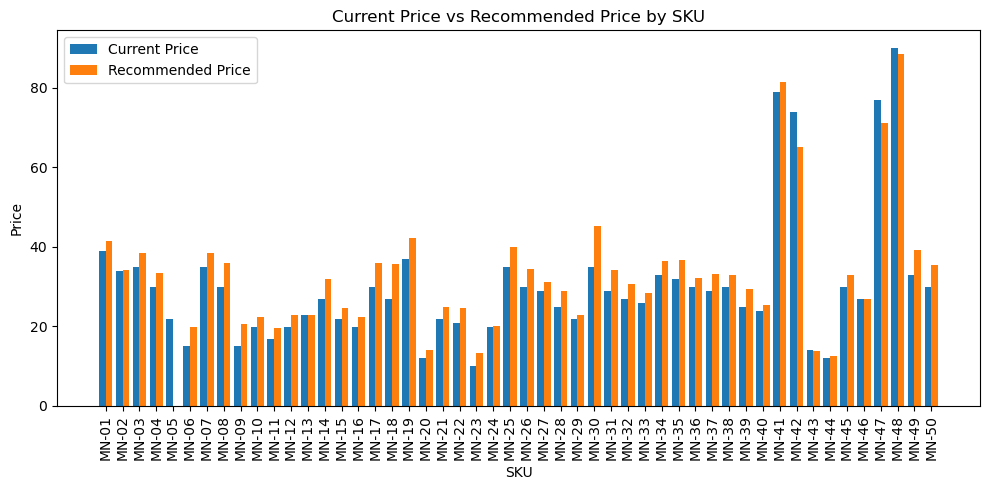

In [157]:


# Ensure SKU-level data
df_plot = df.sort_values("SKU")

x = np.arange(len(df_plot))
bar_width = 0.4

plt.figure(figsize=(10, 5))

# Current Price
plt.bar(
    x - bar_width/2,
    df_plot["Current_Price"],
    bar_width,
    label="Current Price"
)

# Recommended Price
plt.bar(
    x + bar_width/2,
    df_plot["Recommended_New_Price"],
    bar_width,
    label="Recommended Price"
)

plt.xlabel("SKU")
plt.ylabel("Price")
plt.title("Current Price vs Recommended Price by SKU")
plt.xticks(x, df_plot["SKU"], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\saranya cj\AppData\Local\Temp\ipykernel_14740\3102177746.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("price_bucket")["Gross_Margin_%"]


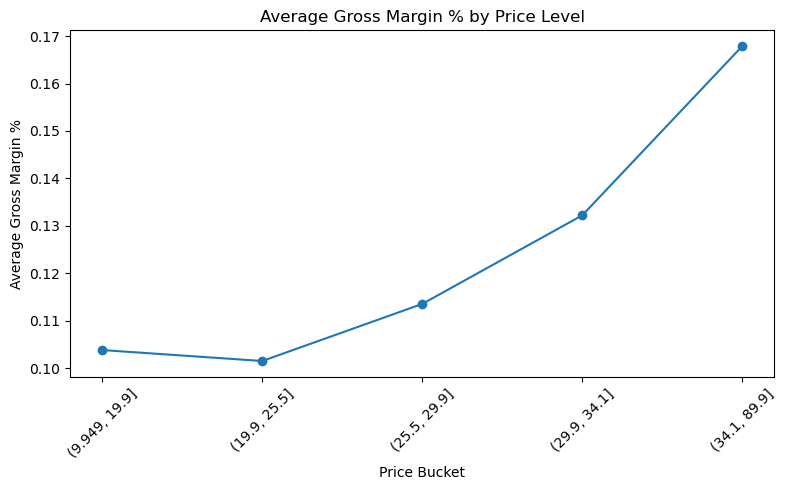

In [155]:

# Create price buckets
df["price_bucket"] = pd.qcut(df["Current_Price"], q=5, duplicates="drop")

# Aggregate margin by price bucket
bucket_margin = (
    df.groupby("price_bucket")["Gross_Margin_%"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(8, 5))

plt.plot(
    bucket_margin["price_bucket"].astype(str),
    bucket_margin["Gross_Margin_%"],
    marker="o"
)

plt.xlabel("Price Bucket")
plt.ylabel("Average Gross Margin %")
plt.title("Average Gross Margin % by Price Level")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [154]:
df["Gross_Margin_$"] = df["Current_Price"] - df["True_Unit_Cost"]
df["Gross_Margin_%"] = df["Gross_Margin_$"] / df["Current_Price"]
df.head

<bound method NDFrame.head of       SKU                       Product_description Product Role  \
0   MN-01  Rectangle Tray -14 x 10 Inch - Pk of  25         Core   
1   MN-02          Rectangle Tray -12x10 - Pk of 25         Core   
2   MN-03         Oval Tray -15x10 Inch - Pk of  25         Core   
3   MN-04          Oval Tray - 13x9 Inch - pk of 25         Core   
4   MN-05     Christmas Tray - 17x12 Inch - Pk of 5     Seasonal   
5   MN-06             Star Tray - 14 Inch - Pk of 5     Seasonal   
6   MN-07                 15 Round plate - pk of 10         Core   
7   MN-08           10 Inch Heart Plates - pk of 25     Seasonal   
8   MN-09            6 Inch Heart Plates - pk of 25     Seasonal   
9   MN-10                  9x6 Rectangle - pk of 25         Core   
10  MN-11          Oval Tray - 13x9 Inch - pk of 10         Core   
11  MN-12       13 inch Round DEEP plate - pk of 10         Core   
12  MN-13       14 inch Round DEEP plate - Pk of 10         Core   
13  MN-14         

In [150]:
plot_df = df[['SKU',
              'target_price',
              'Floor_Price',
              'Recommended_New_Price',
              'Highest_Competitor_Price']].head(5)

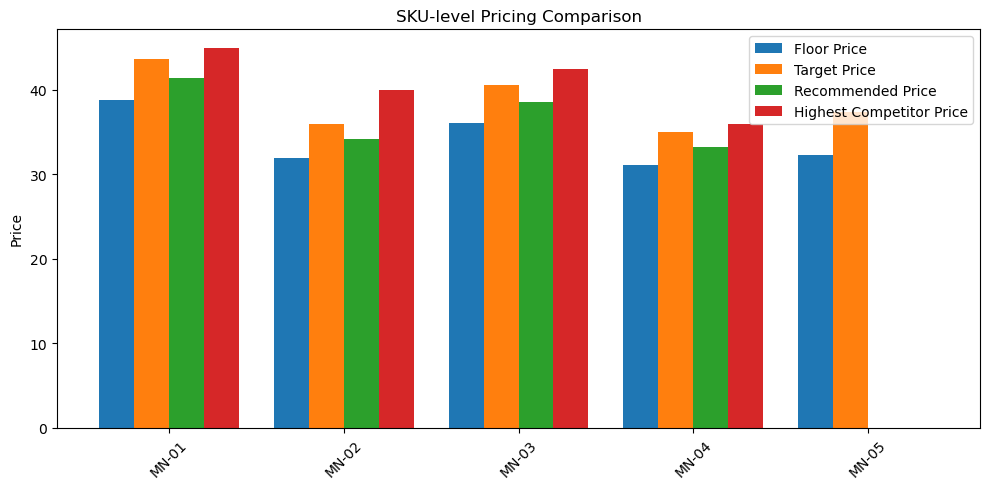

In [156]:
x = np.arange(len(plot_df))
width = 0.2

plt.figure(figsize=(10, 5))

plt.bar(x - 1.5*width, plot_df['Floor_Price'], width, label='Floor Price')
plt.bar(x - 0.5*width, plot_df['target_price'], width, label='Target Price')
plt.bar(x + 0.5*width, plot_df['Recommended_New_Price'], width, label='Recommended Price')
plt.bar(x + 1.5*width, plot_df['Highest_Competitor_Price'], width, label='Highest Competitor Price')

plt.xticks(x, plot_df['SKU'], rotation=45)
plt.ylabel('Price')
plt.title('SKU-level Pricing Comparison')
plt.legend()
plt.tight_layout()
plt.show()

In [152]:
##All SKUs now respect competitor pricing guardrails

(df['Recommended_New_Price'] <= df['Highest_Competitor_Price']).all()


np.True_

In [148]:
df["Price_Difference"] = df["Recommended_New_Price"] - df["Current_Price"]
df[["SKU", "Current_Price", "Recommended_New_Price", "Price_Difference"]].head(10)



,SKU,Current_Price,Recommended_New_Price,Price_Difference
0,MN-01,38.90,41.42,2.52
1,MN-02,33.90,34.11,0.21
2,MN-03,34.90,38.51,3.61
3,MN-04,29.90,33.27,3.37
4,MN-05,21.90,0.00,-21.90
5,MN-06,14.95,19.79,4.84
6,MN-07,34.90,38.31,3.41
7,MN-08,29.90,35.97,6.07
8,MN-09,14.90,20.55,5.65
9,MN-10,19.90,22.32,2.42


In [126]:
df.to_excel("pricing_dashboard_data.xlsx", index=False)


In [127]:
df.head()

,SKU,Product_description,Product Role,Country_of_Origin,FBA Fee,Storage Fee,Handling_Cost,Cost,Current_Price,Minimum_Acceptable_Margin_%,...,Ordered Product Sales,Total Order Items,demand_signal,days-of-supply,inventory_signal,spend,acosClicks7d,ads_signal,Highest_Competitor_Price,price_bucket
0,MN-01,Rectangle Tray -14 x 10 Inch - Pk of 25,Core,India,$15.11,$0.44,$0.75,16.0,38.9,20%,...,24582.01,475.0,high,47.0,overstock,2762.06,31.491089,inefficient,44.90,"(34.1, 89.9]"
1,MN-02,Rectangle Tray -12x10 - Pk of 25,Core,India,$13.55,$0.30,$0.75,12.0,33.9,20%,...,15678.89,326.0,low,85.0,overstock,2286.92,17.450712,efficient,39.95,"(29.9, 34.1]"
2,MN-03,Oval Tray -15x10 Inch - Pk of 25,Core,India,$13.94,$0.34,$0.75,15.0,34.9,20%,...,7340.65,152.0,low,83.0,overstock,670.20,14.699685,efficient,42.50,"(34.1, 89.9]"
3,MN-04,Oval Tray - 13x9 Inch - pk of 25,Core,India,$12.89,$0.30,$0.75,12.0,29.9,20%,...,6002.72,126.0,low,99.0,overstock,903.79,38.972894,inefficient,35.90,"(25.5, 29.9]"
4,MN-05,Christmas Tray - 17x12 Inch - Pk of 5,Seasonal,India,$11.80,$0.22,$0.75,13.0,21.9,25%,...,8040.18,302.0,low,145.0,overstock,637.85,28.954224,inefficient,0.00,"(19.9, 25.5]"


In [128]:
import os
os.getcwd()


'C:\\Users\\saranya cj'

In [195]:
df["Highest_Competitor_Price"] = df["Highest_Competitor_Price"].replace(0, np.nan)


In [ ]:
## Optional Create SKU-Level Pricing ACTION Table

In [323]:
def pricing_action(row):
    if row["Current_Price"] < row["Floor_Price"]:
        return "Corrective Increase"
    elif row["Recommended_New_Price"] > row["Current_Price"]:
        return "Controlled Increase"
    elif row["Recommended_New_Price"] < row["Current_Price"]:
        return "Decrease"
    else:
        return "Maintain"


In [324]:
df["Pricing_Action"] = df.apply(pricing_action, axis=1)



In [325]:
pricing_actions_table = df[[
    "SKU",
    "Current_Price",
    "target_price",
    "Floor_Price",
    "Recommended_New_Price",
    "Pricing_Action"
]]

pricing_actions_table


,SKU,Current_Price,target_price,Floor_Price,Recommended_New_Price,Pricing_Action
0,MN-01,38.90,43.6050,38.7600,41.42,Controlled Increase
1,MN-02,33.90,35.9100,31.9200,34.11,Controlled Increase
2,MN-03,34.90,40.5405,36.0360,38.51,Corrective Increase
3,MN-04,29.90,35.0190,31.1280,33.27,Corrective Increase
4,MN-05,21.90,37.3665,32.2125,0.00,Corrective Increase
5,MN-06,14.95,20.8365,17.9625,19.79,Corrective Increase
6,MN-07,34.90,40.3245,35.8440,38.31,Corrective Increase
7,MN-08,29.90,37.8595,32.6375,35.97,Corrective Increase
8,MN-09,14.90,21.6340,18.6500,20.55,Corrective Increase
9,MN-10,19.90,23.4900,20.8800,22.32,Corrective Increase


In [ ]:
# matrix table

In [326]:
decision_matrix = pd.DataFrame({
    "Below Floor (Unsafe)": [
        "Corrective Increase",
        "Corrective Increase",
        "Corrective Increase"
    ],
    "Above Floor (Safe)": [
        "Controlled Increase",
        "Maintain",
        "Decrease"
    ]
}, index=["Underpriced", "At Target", "Overpriced"])

decision_matrix


,Below Floor (Unsafe),Above Floor (Safe)
Underpriced,Corrective Increase,Controlled Increase
At Target,Corrective Increase,Maintain
Overpriced,Corrective Increase,Decrease
